# Primer Examen 15%

**Mariana Toro Escobar**

**CC. 1004776769**

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


In [2]:
#Librerías
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pylab as plt

df=pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz') #Cargando el archivo Json
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [26]:
# 1. Adicionar la columna "smax"
df['smax']=df['solution'].apply(lambda i: max(map(abs,i))) #Sacando el valor absoluto a cada elemento de las listas de "solution", seleccionando el mayor número y agregándolo a la nueva columna
df

# 2. Adicionar las columnas "sum_s" y "sum_s³" 
df['sum_s']=df['solution'].apply(lambda i: sum(i)) #Sumando los valores de las listas y agregando el resultado a la nueva columna
df
df['sum_s³']=df['solution'].apply(lambda i: (sum(i))**3) #Sumando los valores de las listas, elevándolos al cubo y agregando el resultado a la nueva columna
df

,l,k,solution,gcd,n,smax,sm,sum_s,sum_s³
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0,0
...,...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0,0


La fila es: 221684
Las raíces son: [4.71595801 1.06410553 1.        ]


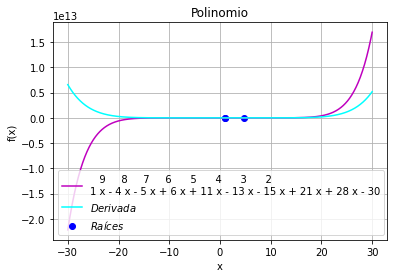

In [193]:
 # 3. Usar como semilla el número de la cédula, construir un polinomio y hallar sus raíces
np.random.seed(1004776769) 
n=np.random.randint(390073) #Generando el número aleatorio
print ("La fila es:", n)

coeficientes=df.loc[n]["solution"] #Extrayendo el número de columna de "solution" y el de fila del número random generado
poli=np.poly1d(coeficientes) #Generando el polinomio con los coeficientes seleccionados
r=np.roots(poli) #Hallando las raíces
rreales=r[r.imag == 0].real
print ("Las raíces son:", rreales)
dp=poli.deriv() #Hallando la derivada del polinomio

x=np.linspace(-30,30,1000) #Graficando
plt.plot(x,poli(x), color="m", label=poli)
plt.grid()
plt.title("Polinomio")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.scatter(rreales, poli(rreales), color="b", label="$Raíces$")
plt.plot(x,dp(x), color="cyan", label="$Derivada$")
plt.legend()

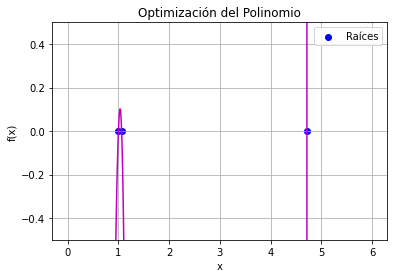

In [195]:
x=np.linspace(0,6,1000) #Optimizando
plt.plot(x,poli(x), color="m")
plt.grid()
plt.title("Optimización del Polinomio")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.scatter(rreales, poli(rreales), color="b", label="Raíces")
ylim=-0.5
ymax=0.5
plt.ylim(ymin,ymax)
plt.legend()

B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

El número de la función es: 1
El valor de p es: 0.8075305991138076


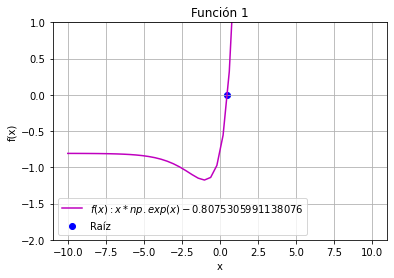

In [213]:
# 1. Generar un número aleatorio usando como semilla el número de la cédula
n=np.random.seed(1004776769) #Generando el número aleatorio
num=np.random.randint(1,5)
print ("El número de la función es:", num)

# 2. Seleccionar la función 1

# 3. Generar número aleatorio y asignarlo a p
p=np.random.random()  #Generando el número entre 0 y 1
print ("El valor de p es:", p)

# 4. Encontrar la solución a la ecuación trascendental y graficarla
f= lambda x: x*np.exp(x)-0.8075305991138076 #Definiendo la función

x=np.linspace(-10,10) #Graficando
plt.grid()
plt.plot(x,f(x),color="m", label="$f(x): x*np.exp(x)-0.8075305991138076$")
plt.legend()
plt.title("Función 1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-2,1)
plt.scatter(rz, f(rz), color="b", label="Raíz") 
plt.legend()

In [217]:
#Aplicando el método de la bisección
a=-10
b=10
rz=optimize.bisect(f, a, b)
print("La raíz es:", rz)
#Aplicando el método de la secante
rz1= optimize.newton(f, 1, fprime=None, args=(), tol=1.48e-8, maxiter=40000, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True) 
print("La raíz es:", rz1)

La raíz es: 0.4931557998554581
La raíz es: 0.493155799854668
